In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [145]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


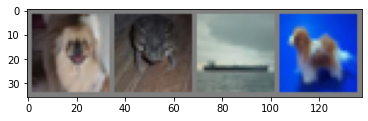

  dog  frog  ship   dog


In [146]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
num_epohs = pd.Series(np.arange(1,51)) 

In [0]:
train_losses = pd.Series(np.arange(1.0,51.0), index = np.arange(1, 51)) 
test_losses = pd.Series(np.arange(1.0,51.0), index = np.arange(1, 51))

train_accurancy = pd.Series(np.arange(1,51), index = np.arange(1, 51)) 
test_accurancy = pd.Series(np.arange(1,51), index = np.arange(1, 51))

In [153]:
for epoch in range(1, 51):  # loop over the dataset multiple times
    
    print('Train epoch: %d' %(epoch))
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
             print('[%d, %5d] loss: %.3f' %
                   (epoch, i + 1, running_loss / 2000))
             running_loss = 0.0
    

    with torch.no_grad():
        correct_tr = 0
        total_tr = 0
        running_loss_tr = 0.0

        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_tr += labels.size(0)
            correct_tr += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss_tr += loss.item()
            
        correct_t = 0
        total_t = 0
        running_loss_t = 0.0
       
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_t += labels.size(0)
            correct_t += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss_t += loss.item()


    train_losses[epoch] = running_loss_tr/len(trainloader)
    print('Loss on train images: ', train_losses[epoch])   

    test_losses[epoch] = running_loss_t/len(testloader)
    print('Loss on test images: ', test_losses[epoch])   

    train_accurancy[epoch] = 100 * correct_tr / total_tr
    print('Accuracy of the network on train images: %d %%' % (train_accurancy[epoch]))  
       
    test_accurancy[epoch] = 100 * correct_t / total_t
    print('Accuracy of the network on test images: %d %%' % (test_accurancy[epoch]))

print('Finished Training')

Train epoch: 1
[1,  2000] loss: 2.196
[1,  4000] loss: 1.835
[1,  6000] loss: 1.672
[1,  8000] loss: 1.597
[1, 10000] loss: 1.493
[1, 12000] loss: 1.467
Loss on train images:  1.4494927034568788
Loss on test images:  1.4591764982819557
Accuracy of the network on train images: 47 %
Accuracy of the network on test images: 47 %
Train epoch: 2
[2,  2000] loss: 1.382
[2,  4000] loss: 1.344
[2,  6000] loss: 1.350
[2,  8000] loss: 1.330
[2, 10000] loss: 1.299
[2, 12000] loss: 1.265
Loss on train images:  1.1752237238946557
Loss on test images:  1.219584356239438
Accuracy of the network on train images: 58 %
Accuracy of the network on test images: 56 %
Train epoch: 3
[3,  2000] loss: 1.198
[3,  4000] loss: 1.206
[3,  6000] loss: 1.196
[3,  8000] loss: 1.190
[3, 10000] loss: 1.176
[3, 12000] loss: 1.163
Loss on train images:  1.085006265979223
Loss on test images:  1.1737271815482526
Accuracy of the network on train images: 61 %
Accuracy of the network on test images: 58 %
Train epoch: 4
[4,  2

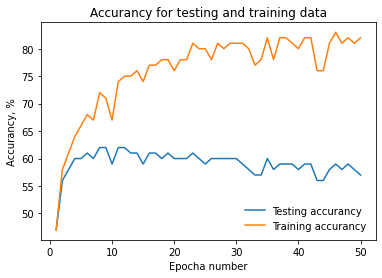

In [154]:
plt.plot(num_epohs, test_accurancy, label='Testing accurancy')
plt.plot(num_epohs, train_accurancy, label='Training accurancy')
plt.legend(frameon=False)
plt.title('Accurancy for testing and training data')
plt.xlabel('Epocha number')
plt.ylabel('Accurancy, %')
plt.show()

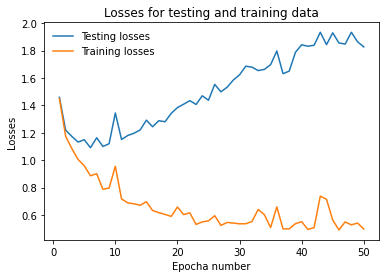

In [155]:
plt.plot(num_epohs, test_losses, label='Testing losses')
plt.plot(num_epohs, train_losses, label='Training losses')
plt.legend(frameon=False)
plt.title('Losses for testing and training data')
plt.xlabel('Epocha number')
plt.ylabel('Losses')
plt.show()

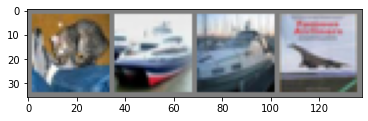

GroundTruth:    cat  ship  ship plane


In [156]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [157]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   cat  ship


In [158]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [159]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 72 %
Accuracy of  bird : 51 %
Accuracy of   cat : 45 %
Accuracy of  deer : 43 %
Accuracy of   dog : 44 %
Accuracy of  frog : 65 %
Accuracy of horse : 63 %
Accuracy of  ship : 71 %
Accuracy of truck : 55 %
